# Ballistic Deposition with Competition

Surface growth model incorporating competitive deposition mechanisms. Studies how competing growth processes affect surface morphology and roughening dynamics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [3]:
#a function to find the smallest value amoung 3 numbers
def biggest(a, b):
    if a >= b:
        return a
    else:
        return b

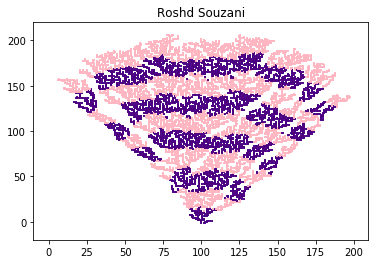

In [41]:
# Kenarneshast for x particles in an array of size L
x = 10000 * 2
L = 200
line     = np.zeros(L)

for i in range(L):
    line[i] = -1000
line[int(L/2)] = 0

T     = np.arange(x)

w     = np.zeros(x)

color = np.array(['indigo', 'lightpink'])

x = np.array([])
y = np.array([])

for t in T:
    #Kenar neshast
    i = int(random.random() * L)
    
    if line[i] >= line[(i+1)%L] and line[i] >= line[(L+i-1)%L]:
        line[i] += 1
    else:
        line[i] = biggest(line[(i+1)%L], line[(L+i-1)%L])
    
    #this is the way i want to plot it!
    x = np.append(x, int(i))
    y = np.append(y, int(line[i]))
        
        
#print(x)
j = k = 0
for t in T:
    if t%2000 == 0:
        plt.scatter(x[j*2000 : (j+1)*2000], y[j*2000 : (j+1)*2000] , marker = 's' , s = 1, color = color[k])
        j += 1
        k = (k+1)%2
        
plt.ylim(-20, 220)
plt.title("Roshd Souzani")
plt.savefig('Souzani.png')

plt.show()  

In [31]:
def Souzani(x, L):
    line = np.zeros(L)
    for i in range(L):
        line[i] = -1000
    line[int(L/2)] = 0
    
    T    = np.arange(x)
    m    = int(x/1000)
    w    = np.zeros(m)

    for t in T:
        #Kenar neshast
        i = int(random.random() * L)

        if line[i] >= line[(i+1)%L] and line[i] >= line[(L+i-1)%L]:
            line[i] += 1
        else:
            line[i] = biggest(line[(i+1)%L], line[(L+i-1)%L])

        if t%1000 == 0:
            l = 100
            r = 100
            for c in range(L):
                if line[c]>=0:
                    if c < l:
                        l = c
                    elif c > r:
                        r = c
            w[int(t/1000)] = (r-l)
        
    return w

In [32]:
%%time
N = 20
x = 20000
L = 200
m = int(x/1000)
ws = np.zeros((N, m))
for n in range(N):
    ws[n] = Souzani(x, L)

w_av = np.zeros(m)

for t in range(m):
    w_av[t] = np.mean(ws[:, t]) 
    

Wall time: 2.02 s


[0.01003643 0.54642857]


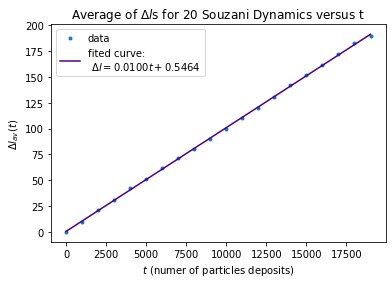

In [40]:
plt.plot(np.arange(m) * 1000, w_av, '.', label = 'data')

sh = np.polyfit(np.arange(m) * 1000, w_av, 1)
print(sh)
plt.plot(np.arange(m) * 1000, sh[0] * np.arange(m) * 1000 + sh[1], c = 'indigo', label = 'fited curve:\n $\Delta l = 0.0100 t + 0.5464$')
plt.legend()
plt.title("Average of $\Delta l$s for 20 Souzani Dynamics versus t")
plt.ylabel("$\Delta l_{av}(t)$")
plt.xlabel("$t$ (numer of particles deposits)")
plt.savefig('lr.png')